In [2]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
from datetime import datetime
from dateutil.parser import parse
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import copy

from Module.Preprocessing import *
from Module.Model import *

# 한글 깨짐 폰트설정

In [19]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 일단 읽고 종속변수만 변수로 받기

In [4]:
X_train_After_IPO_1 = pd.read_csv('CleanData/X_train_After_IPO_1.csv', thousands=',', encoding = 'cp949')
X_train_After_IPO_3 = pd.read_csv('CleanData/X_train_After_IPO_3.csv', thousands=',', encoding = 'cp949')
X_train_Before_IPO = pd.read_csv('CleanData/X_train_Before_IPO.csv', thousands=',', encoding = 'cp949')
X_train_Close_IPO = pd.read_csv('CleanData/X_train_EndPrice_IPO.csv', encoding = 'cp949')

X_train_After_IPO_1.set_index('종목명',inplace = True)
X_train_After_IPO_3.set_index('종목명',inplace = True)
X_train_Before_IPO.set_index('종목명',inplace = True)
X_train_Close_IPO.set_index('종목명',inplace = True)

In [5]:
IPO_1 = X_train_Before_IPO['공모가 대비 1개월 수익률']
IPO_3 = X_train_Before_IPO['공모가 대비 3개월 수익률']
IPO_6 = X_train_Before_IPO['공모가 대비 6개월 수익률']
After_1 = X_train_After_IPO_1['1_3_수익률']
After_3 = X_train_After_IPO_3['3_6_수익률']
Close_1 = X_train_Close_IPO['종가 대비 1개월 수익률']
Close_3 = X_train_Close_IPO['종가 대비 3개월 수익률']
Close_6 = X_train_Close_IPO['종가 대비 6개월 수익률']

Y_values = [IPO_1, IPO_3, IPO_6, After_1, After_3, Close_1, Close_3, Close_6]

# 가공전 수익률에서 기초 통계

In [6]:
Y_value_df = pd.DataFrame(Y_values).T
Y_value_df.describe()

,공모가 대비 1개월 수익률,공모가 대비 3개월 수익률,공모가 대비 6개월 수익률,1_3_수익률,3_6_수익률,종가 대비 1개월 수익률,종가 대비 3개월 수익률,종가 대비 6개월 수익률
count,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000,622.000000
mean,0.286007,0.285863,0.321751,0.027379,0.033828,-0.034940,-0.015367,0.017257
std,0.606254,0.615625,0.771497,0.276009,0.316318,0.304199,0.400417,0.531660
min,-0.505000,-0.625000,-0.673143,-0.546196,-0.599561,-0.642105,-0.664674,-0.699390
25%,-0.102857,-0.107505,-0.150042,-0.136160,-0.136140,-0.226730,-0.273142,-0.312600
50%,0.091608,0.110000,0.093750,-0.005160,-0.020855,-0.081094,-0.075361,-0.074385
75%,0.486455,0.495709,0.571071,0.124848,0.118863,0.073752,0.104000,0.143480
max,3.908333,4.520000,5.700000,2.219355,3.278146,1.845411,3.620370,5.203704


# 가공전 수익률 분포

C:\Users\HY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HY\anaconda3\lib\site-packages\

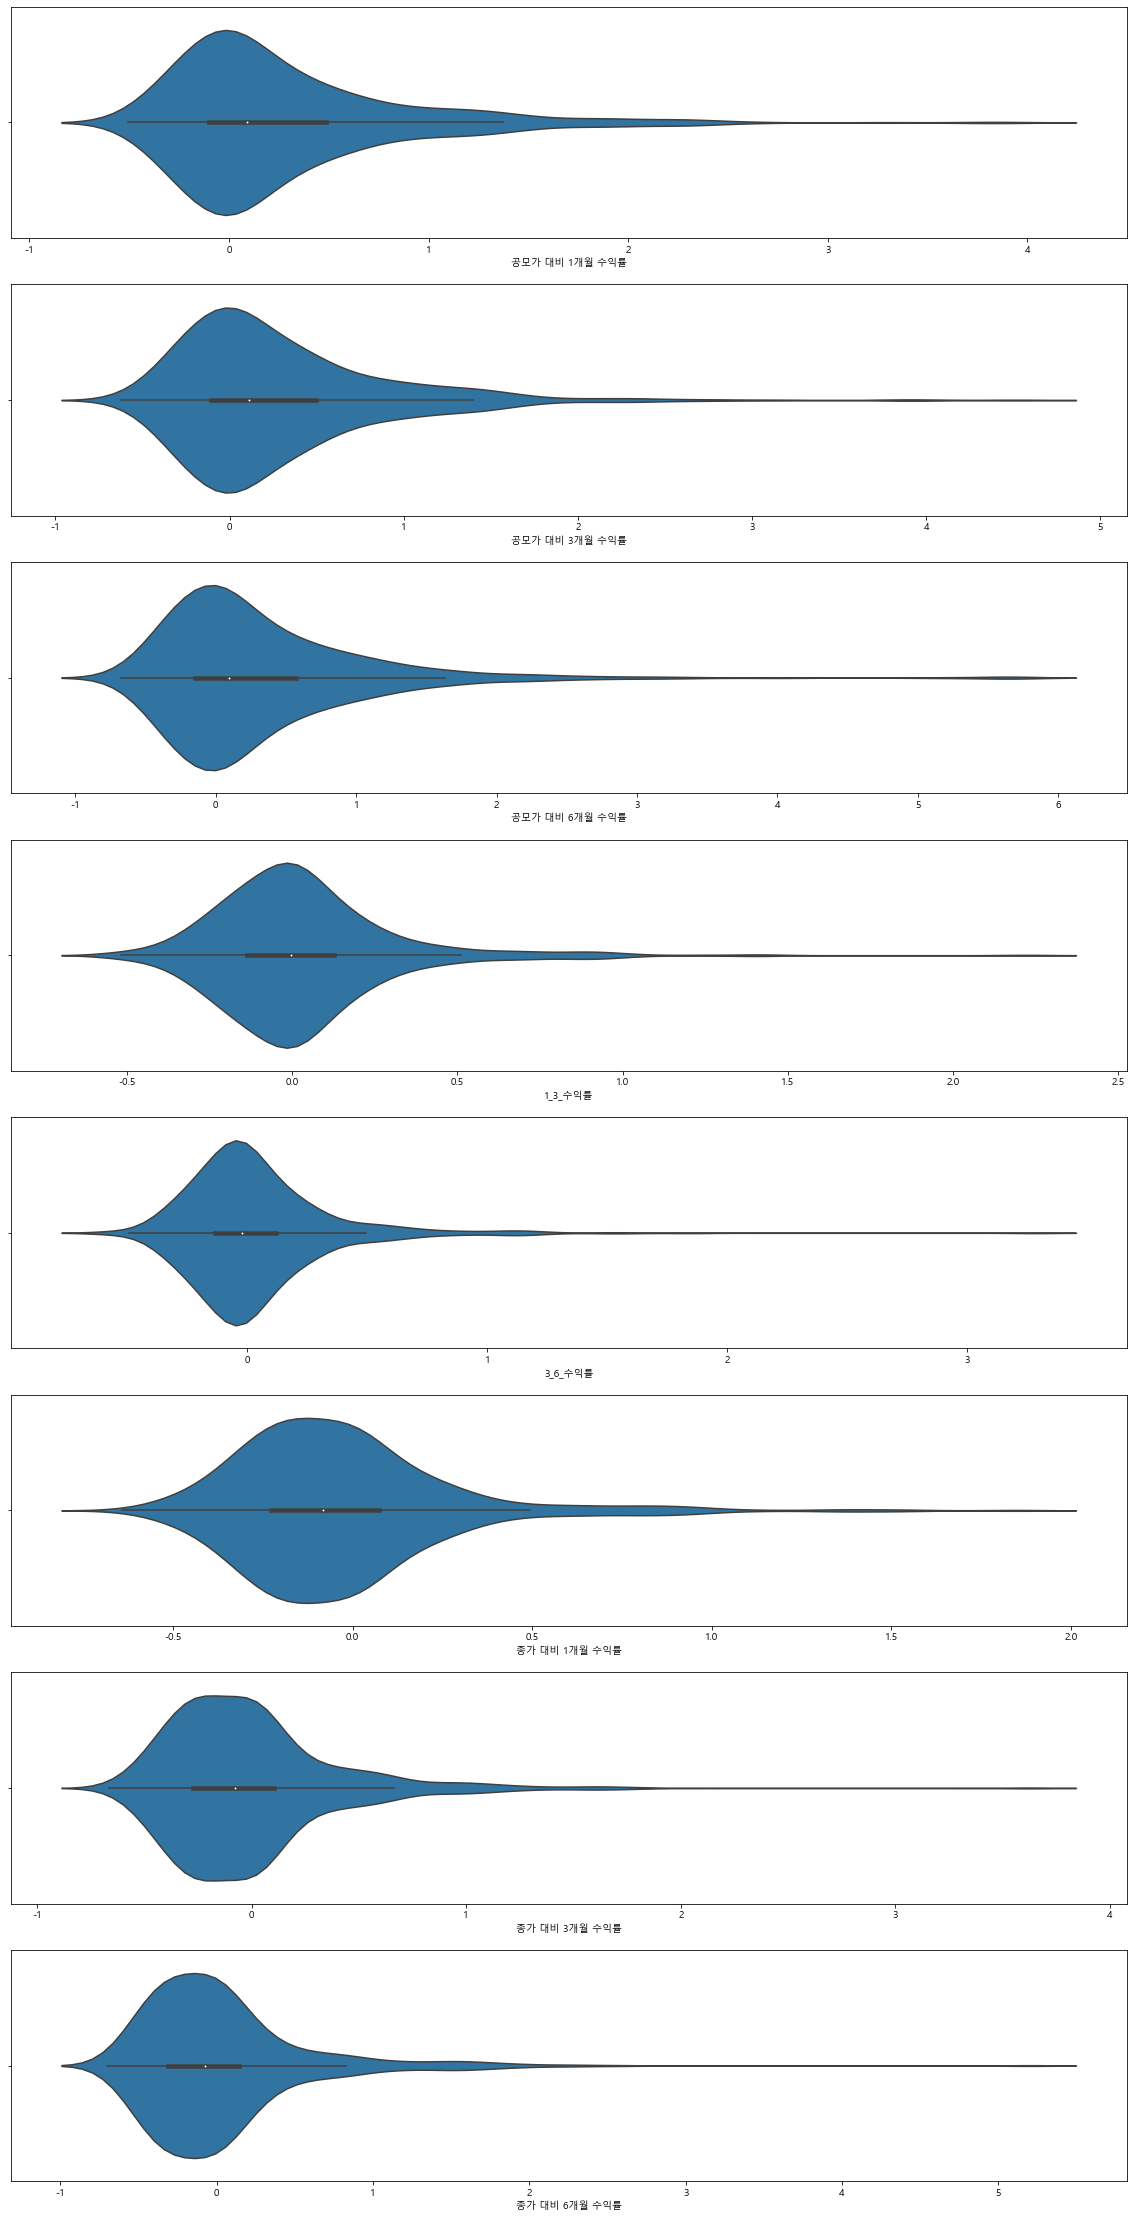

In [27]:
plt.figure(figsize=(20,40))
k = 0  # enum
for i in Y_values:
    k += 1    
    len_list = len(Y_values)
    plot = len_list*100+10+k
    plt.subplot(plot)
    sns.violinplot(i)
plt.show()

# Cut 설정 - 이 아래는 반복작업이여서 그냥 반복문으로 처리할 걸 그랬음

In [28]:
Short_Cut = [-0.1, 0.1, 0.2]
Long_Cut = [-0.2, 0.2, 0.4]

In [29]:
IPO_1_Cut = Cut(IPO_1,Short_Cut)
IPO_3_Cut = Cut(IPO_3,Short_Cut)
IPO_6_Cut = Cut(IPO_6,Long_Cut)
After_1_Cut = Cut(After_1,Short_Cut)
After_3_Cut = Cut(After_3,Short_Cut)
Close_1_Cut = Cut(Close_1,Short_Cut)
Close_3_Cut = Cut(Close_3,Short_Cut)
Close_6_Cut = Cut(Close_6,Long_Cut)

Y_values_Cut = [IPO_1_Cut,IPO_3_Cut,IPO_6_Cut,After_1_Cut,After_3_Cut, Close_1_Cut, Close_3_Cut, Close_6_Cut]

# Cut 이후 통계

In [30]:
Y_values_Cut_nums = [ i.value_counts().sort_index() for i in Y_values_Cut]

1    158
2    159
3     50
4    255
Name: 공모가 대비 1개월 수익률, dtype: int64
1    162
2    145
3     50
4    265
Name: 공모가 대비 3개월 수익률, dtype: int64
1    125
2    230
3     72
4    195
Name: 공모가 대비 6개월 수익률, dtype: int64
1    192
2    256
3     71
4    103
Name: 1_3_수익률, dtype: int64
1    196
2    250
3     64
4    112
Name: 3_6_수익률, dtype: int64
1    296
2    192
3     44
4     90
Name: 종가 대비 1개월 수익률, dtype: int64
1    296
2    167
3     42
4    117
Name: 종가 대비 3개월 수익률, dtype: int64
1    233
2    256
3     45
4     88
Name: 종가 대비 6개월 수익률, dtype: int64


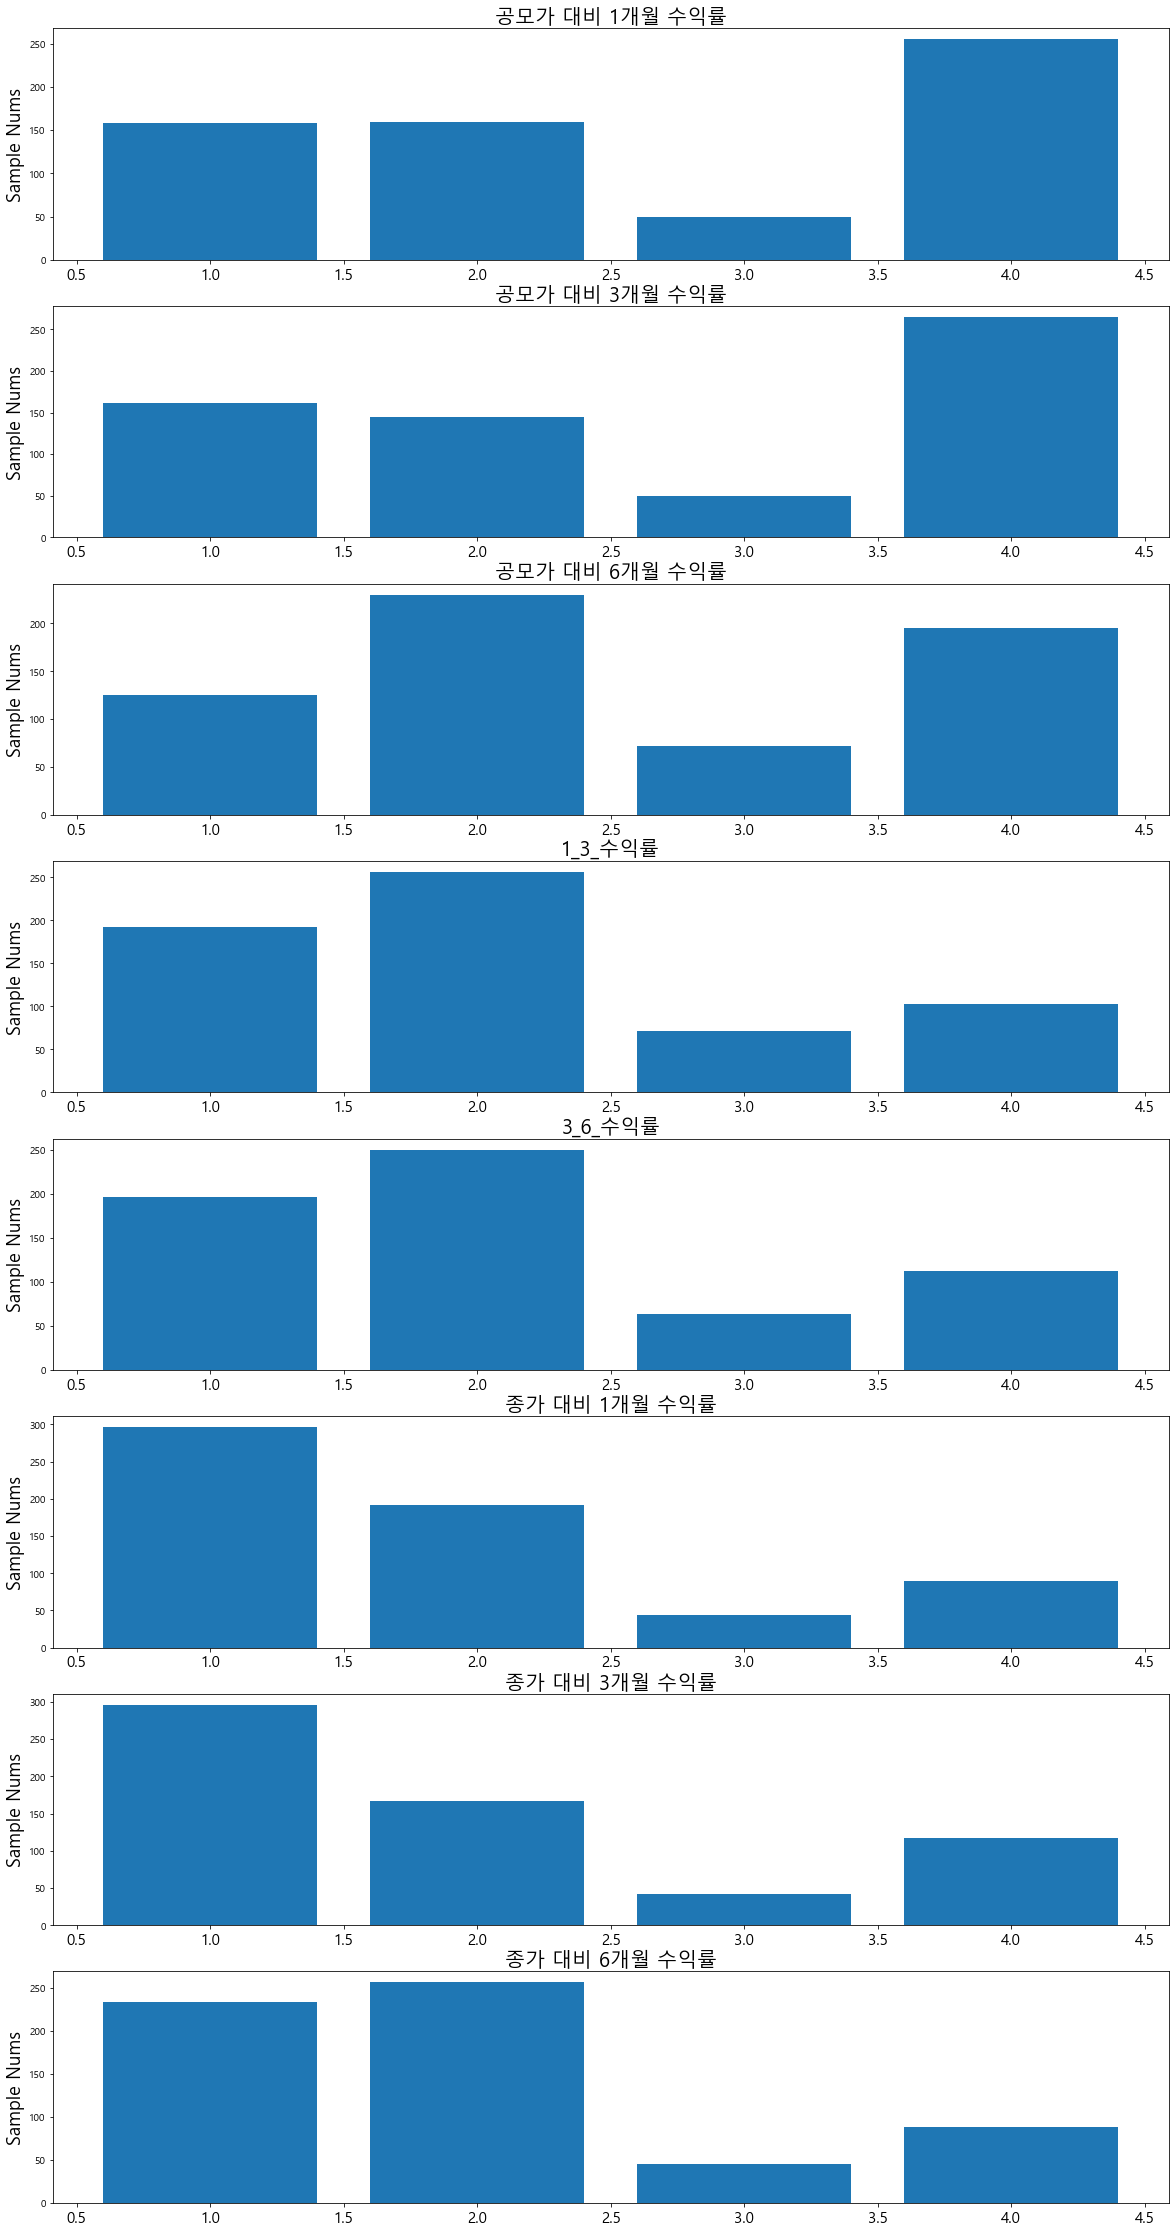

In [31]:
len_list = len(Y_values_Cut_nums)
index = range(1, len(Y_values_Cut_nums[0])+1 ) # 이거는 필요에 따라 loop안에서 돌필요도 있을 것 같음
plt.figure(figsize=(20,40))
k = 0
for i in Y_values_Cut_nums:
    k += 1    
    plot = len_list*100+10+k
    plt.subplot(plot)
    plt.bar(index,i)
    plt.title(i.name, fontsize=20)
    plt.ylabel('Sample Nums', fontsize=18)
    #plt.xlabel('y-value group', fontsize=18)
    plt.xticks(fontsize=15)
    print(i)


plt.show()

# 변수간 상관관계 파악하기

In [32]:
XyDfs = []
XyDfs.append(X_train_Before_IPO)
XyDfs.append(X_train_After_IPO_1)
XyDfs.append(X_train_After_IPO_3)
XyDfs.append(X_train_Close_IPO)

# 특징정리
* 상장 후 Trading 변수들간에는 어느 정도 상간관계가 있는 것으로 보임
* 공모 전 1년을 놓고 봤을때 시장변수들의 상관관계가 어느 정도 있는것으로 파악됨

# 추가 아이디어
* Trading 지표가 없을때, 1달치, 3달치 들어감에 따라 정보의 영향력이 어떻게 바뀌는지 Test
* 공모전에는 공모가격 선정자가 선정한 영향력이 얼마인지 이후에는 그런 per pbr의 영향력이 어떻게 바뀌는지 체크
* Feature importance, permutation importance 등의 변수 중요도의 해석이 중요함 & 또한, 이것들이 중요한 것인지 어떻게 검정할지 고민하는 것도 중요함--> 평균검정

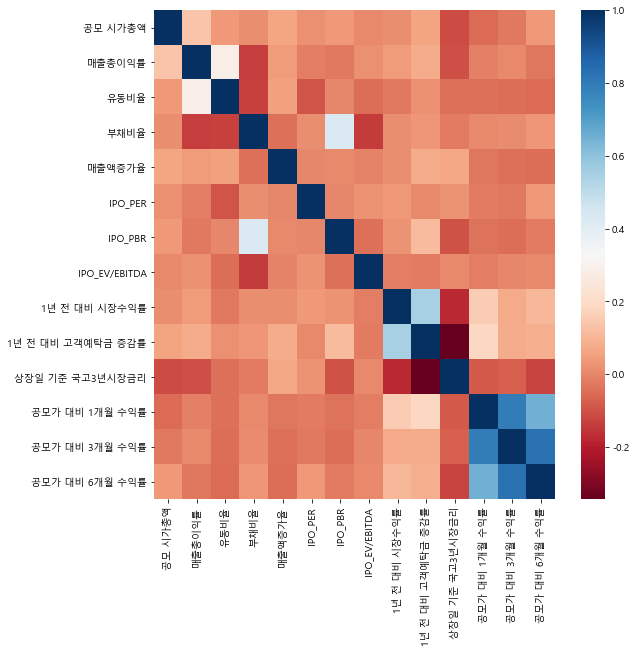

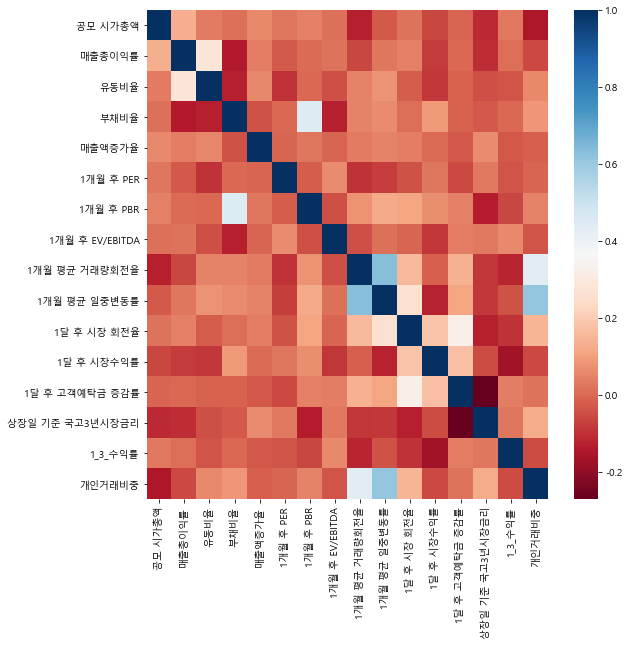

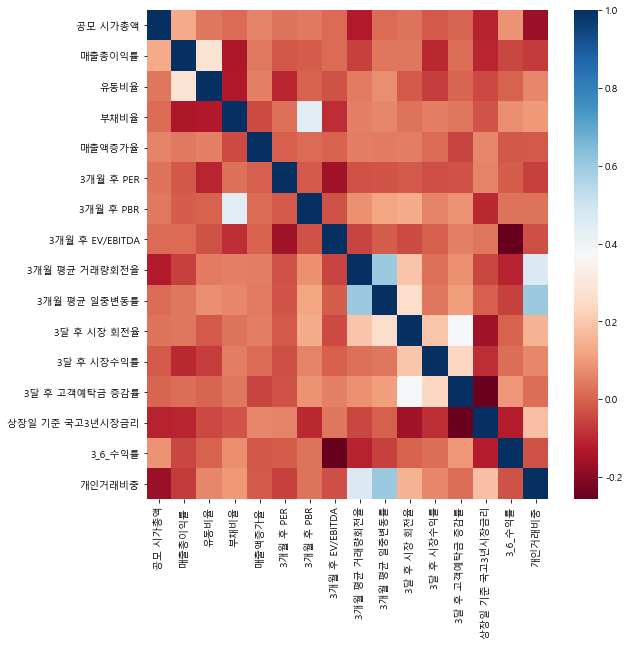

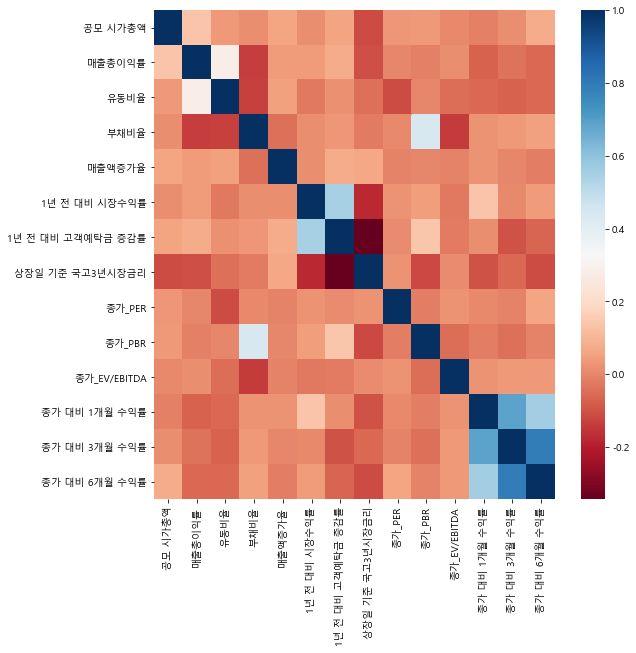

In [33]:
for i in XyDfs:
    plt.figure(figsize =(9,9))
    corr = i.corr()
    sns.heatmap(corr, cmap = 'RdBu')

# F/I 영향력 분석
폴더에 파일들 다 get --> 하나씩 순차적으로 돌아가면서 대지표별 영향 평균 수집 (통계는 시간나면)

In [34]:
Trading = ['3개월 평균 거래량회전율','3개월 평균 일중변동률','3개월 시가총액회전율',
           '1개월 평균 거래량회전율','1개월 평균 일중변동률','1개월 시가총액회전율', '개인거래비중']
Market = ['3달 후 시장 회전율','3달 후 시장수익률','3달 후 고객예탁금 증감률',
          '1달 후 시장 회전율','1달 후 시장수익률','1달 후 고객예탁금 증감률',
          '1년전 대비 시장 회전율','1년 전 대비 시장수익률','1년 전 대비 고객예탁금 증감률','상장일 기준 국고3년시장금리']
Value = ['3개월 후 EV/EBITDA', '3개월 후 PBR', '3개월 후 PER'
         ,'1개월 후 EV/EBITDA', '1개월 후 PBR', '1개월 후 PER'
        ,'종가_EV/EBITDA', '종가_PBR', '종가_PER','IPO_EV/EBITDA', 'IPO_PBR', 'IPO_PER']
Finance = ['매출액증가율', '부채비율','유동비율','매출총이익률']
Indexes = [Trading, Market, Value, Finance]

In [3]:
path_dir = 'Result/랜덤포레스트/feature 값' 
file_list = os.listdir(path_dir)
print(file_list)

['0_1_feature별 값.csv', '0_3_feature별 값.csv', '0_6_feature별 값.csv', '1_3_feature별 값.csv', '3_6_feature별 값.csv', 'end_1_feature별 값.csv', 'end_3_feature별 값.csv', 'end_6_feature별 값.csv']


In [5]:
for file in file_list:
    F_Is = pd.read_csv(path_dir+'//'+file, encoding = 'cp949')
    F_Is.set_index('Unnamed: 0', inplace = True)
    F_Is.index.name = 'index'
    
    DataFrame = []
    
    for col in range(F_Is.shape[1]):
        Means = []
        Used_Indexes = []
        for index in Indexes:
            Values = []
            for indicator in index:
                F_I = F_Is.iloc[:,col]
                try:
                    value = F_I.loc[indicator]
                    Values.append(value)
                except:
                    continue
                    
            if (len(Values) == 0):
                continue
            else :
                Used_Indexes.append(str(index))
                Feature_Importance_mean = np.mean(Values)
                Means.append(Feature_Importance_mean)
        
        DataFrame.append(Means)
    Mean_df = pd.DataFrame(DataFrame).T
    if (Mean_df.shape[0] == 3 ):
        Mean_df.index = ['Market','Value','Finance']
        Mean_df.columns = F_Is.columns
    elif (Mean_df.shape[0] == 4 ):
        Mean_df.index = ['Trading','Market','Value','Finance']
        Mean_df.columns = F_Is.columns
    Total_df = pd.concat([F_Is,Mean_df])
    Total_df.to_csv(path_dir+ '//' +file, encoding = 'euc-kr')

# 종속변수 수익률 별 구분 및 분포 파악
>공모가,종가 1,3,6수익률이 같이 들어있는 데이터에서 목적에 맞게 구분
- df_0_1(공모가 대비 1개월 수익률)
- df_0_3(공모가 대비 3개월 수익률)
- df_0_6(공모가 대비 6개월 수익률)
- df_1_3(1_3 수익률 - 1개월 대비 3개월 수익률)
- df_3_6(3_6 수익률 - 3개월 대비 6개월 수익률)
- df_end_1(종가 대비 1개월 수익률)
- df_end_3(종가 대비 3개월 수익률)
- df_end_6(종가 대비 6개월 수익률)

In [3]:
df_1_3 = pd.read_csv("CleanData/X_train_After_IPO_1.csv", encoding = 'cp949')
df_3_6 = pd.read_csv("CleanData/X_train_After_IPO_3.csv", encoding = 'cp949')
df_0 = pd.read_csv("CleanData/X_train_Before_IPO.csv", encoding = 'cp949')
df_end = pd.read_csv("CleanData/X_train_EndPrice_IPO.csv", encoding = 'cp949')

In [4]:
df_0_1 = df_0.drop(['공모가 대비 3개월 수익률','공모가 대비 6개월 수익률'],axis =1)
df_0_3 = df_0.drop(['공모가 대비 1개월 수익률','공모가 대비 6개월 수익률'],axis =1)
df_0_6 = df_0.drop(['공모가 대비 1개월 수익률','공모가 대비 3개월 수익률'],axis =1)

In [5]:
df_end_1 = df_end.drop(['종가 대비 3개월 수익률','종가 대비 6개월 수익률'],axis =1)
df_end_3 = df_end.drop(['종가 대비 1개월 수익률','종가 대비 6개월 수익률'],axis =1)
df_end_6 = df_end.drop(['종가 대비 1개월 수익률','종가 대비 3개월 수익률'],axis =1)

> process 함수 적용(train 데이터 , test 데이터의 종속변수 분포를 카테고리에 맞게 분류
- 수익률 < -0.1 == 1 (sell)
- -0.1 < 수익률 < 0.1 == 2 (hold)
-  0.1 < 수익률 < 0.2 == 3 (buy)
-  0.2 < 수익률 == 4 (strong buy)

In [6]:
df_0_1 = process(df_0_1,'공모가 대비 1개월 수익률')
df_0_3 = process(df_0_3,'공모가 대비 3개월 수익률')
df_0_6 = process(df_0_6,'공모가 대비 6개월 수익률')
df_1_3 = process(df_1_3,'1_3_수익률')
df_3_6 = process(df_3_6,'3_6_수익률')
df_end_1 = process(df_end_1,'종가 대비 1개월 수익률')
df_end_3 = process(df_end_3,'종가 대비 3개월 수익률')
df_end_6 = process(df_end_6,'종가 대비 6개월 수익률')

In [7]:
df_0_1

,model_set_0,model_set_1,model_set_2,model_set_3,model_set_4,model_set_5,model_set_6,model_set_7,model_set_8,model_set_9,...,model_set_22,model_set_23,model_set_24,model_set_25,model_set_26,model_set_27,model_set_28,model_set_29,model_set_30,model_set_31
Train_1,55,55,53,57,49,48,47,40,35,31,...,50,56,57,59,65,60,66,66,71,58
Train_2,40,40,36,36,33,28,25,28,23,27,...,73,78,79,77,78,82,79,75,70,66
Train_3,12,10,11,12,12,13,12,14,13,15,...,24,22,22,21,19,19,17,17,19,21
Train_4,61,49,50,55,55,54,55,67,68,73,...,96,86,89,82,82,72,71,74,88,95
Test_1,7,7,10,5,5,6,5,14,14,14,...,20,18,23,21,19,14,11,10,4,3
Test_2,4,3,7,9,9,14,16,19,22,21,...,21,23,22,19,14,4,5,5,3,1
Test_3,2,4,3,6,6,6,8,6,8,6,...,3,3,3,2,4,4,5,5,3,1
Test_4,17,16,16,26,25,30,32,32,33,26,...,18,18,15,18,27,36,48,45,30,14
